In [11]:
import pandas as pd

# Load the CSV files
#02/20/2020
df = pd.read_csv('LWC_SP_200220.csv', skiprows=12)

#02/26/2020
df1 = pd.read_csv('LWC_SP_200226.csv', skiprows=12)

#03/04/2020
df2 = pd.read_csv('LWC_SP_200304.csv', skiprows=12)

# Print out the column names
print(df.head())


   # Top (cm)  Bottom (cm)  Avg Density (kg/m3)  Permittivity A  \
0        60.0         50.0               304.00           1.593   
1        50.0         40.0               281.00           1.434   
2        40.0         30.0               297.00           1.285   
3        30.0         20.0               286.25           1.318   
4        20.0         10.0               348.00           1.363   

   Permittivity B  LWC-vol A (%)  LWC-vol B (%)  
0           1.535            0.7           0.40  
1           1.466            0.1           0.26  
2           1.318            0.0           0.00  
3           1.239            0.0           0.00  
4           1.434            0.0           0.00  


In [12]:
# %%
import numpy as np

# Use column indices to select relevant columns
LWCvolA = df.columns[5]  
LWCvolB = df.columns[6]  

# Create a new column 'Mean_Column1_Column2' that contains the mean of the two existing columns
df['LWC-volmean'] = df[[LWCvolA, LWCvolB]].mean(axis=1)
df1['LWC-volmean'] = df1[[LWCvolA, LWCvolB]].mean(axis=1)
df2['LWC-volmean'] = df2[[LWCvolA, LWCvolB]].mean(axis=1)

# print head
print(df[[LWCvolA, LWCvolB, 'LWC-volmean']].head())
print(df1[[LWCvolA, LWCvolB, 'LWC-volmean']].head())
print(df2[[LWCvolA, LWCvolB, 'LWC-volmean']].head())

   LWC-vol A (%)  LWC-vol B (%)  LWC-volmean
0            0.7           0.40         0.55
1            0.1           0.26         0.18
2            0.0           0.00         0.00
3            0.0           0.00         0.00
4            0.0           0.00         0.00
   LWC-vol A (%)  LWC-vol B (%)  LWC-volmean
0            0.0            0.0          0.0
1            0.0            0.0          0.0
2            0.0            0.0          0.0
3            0.0            0.0          0.0
4            0.0            0.0          0.0
   LWC-vol A (%)  LWC-vol B (%)  LWC-volmean
0           2.41           2.42        2.415
1           0.00           0.70        0.350
2           0.00           0.00        0.000
3           0.00           0.00        0.000
4           0.00           0.00        0.000


In [32]:
# get bulk LWC
df['LWCsum'] = df['LWC-volmean'].sum()
df['HS'] = df['# Top (cm)'].iloc[0]
df['LWCbulk'] = df['LWCsum'].iloc[0] / df['HS']

df1['LWCsum'] = df1['LWC-volmean'].sum()
df1['HS'] = df1['# Top (cm)'].iloc[0]
df1['LWCbulk'] = df1['LWCsum'].iloc[0] / df1['HS']

df2['LWCsum'] = df2['LWC-volmean'].sum()
df2['HS'] = df2['# Top (cm)'].iloc[0]
df2['LWCbulk'] = df2['LWCsum'].iloc[0] / df ['HS']

#print
print(df[['LWCsum', 'LWCbulk', 'HS']].head())
print(df1[['LWCsum', 'LWCbulk', 'HS']].head())
print(df2[['LWCsum', 'LWCbulk', 'HS']].head())

   LWCsum   LWCbulk    HS
0    0.73  0.012167  60.0
1    0.73  0.012167  60.0
2    0.73  0.012167  60.0
3    0.73  0.012167  60.0
4    0.73  0.012167  60.0
   LWCsum   LWCbulk    HS
0   0.135  0.002045  66.0
1   0.135  0.002045  66.0
2   0.135  0.002045  66.0
3   0.135  0.002045  66.0
4   0.135  0.002045  66.0
   LWCsum  LWCbulk    HS
0    2.94    0.049  57.0
1    2.94    0.049  57.0
2    2.94    0.049  57.0
3    2.94    0.049  57.0
4    2.94    0.049  57.0


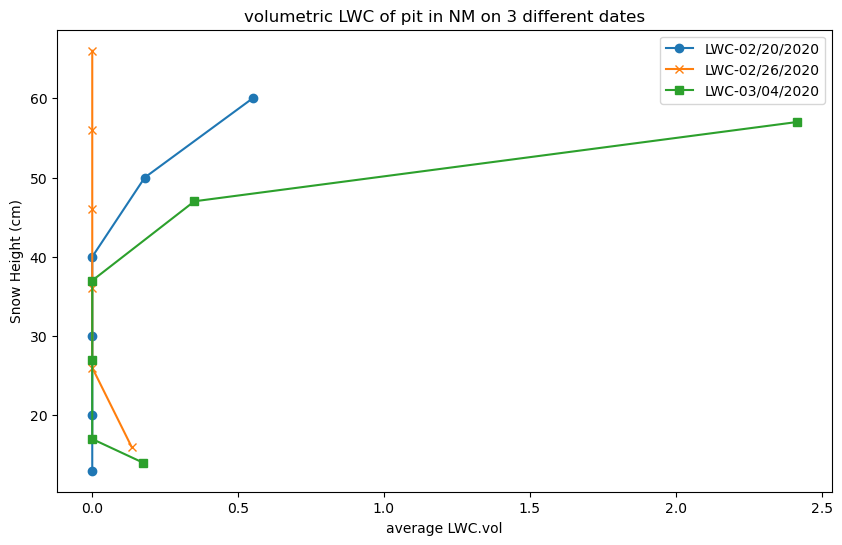

In [33]:
#plot LWC vol for one pit with height on y-axis and lwc vol on x-axis
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.plot(df['LWC-volmean'], df['# Top (cm)'], marker='o', label = 'LWC-02/20/2020')
         
# Plot the second LWC data (LWC-bulk1)
plt.plot(df1['LWC-volmean'], df1['# Top (cm)'], marker='x', label='LWC-02/26/2020')

# Plot the third LWC data (LWC-bulk2)
plt.plot(df2['LWC-volmean'], df2['# Top (cm)'], marker='s', label='LWC-03/04/2020')

# Add labels and title
plt.xlabel('average LWC.vol')
plt.ylabel('Snow Height (cm)')
plt.title('volumetric LWC of pit in NM on 3 different dates')
plt.legend()

# Display the plot
plt.show()

         Date   LWCbulk
0  02/20/2020  0.012167
1  02/26/2020  0.002045
2  03/04/2020  0.049000


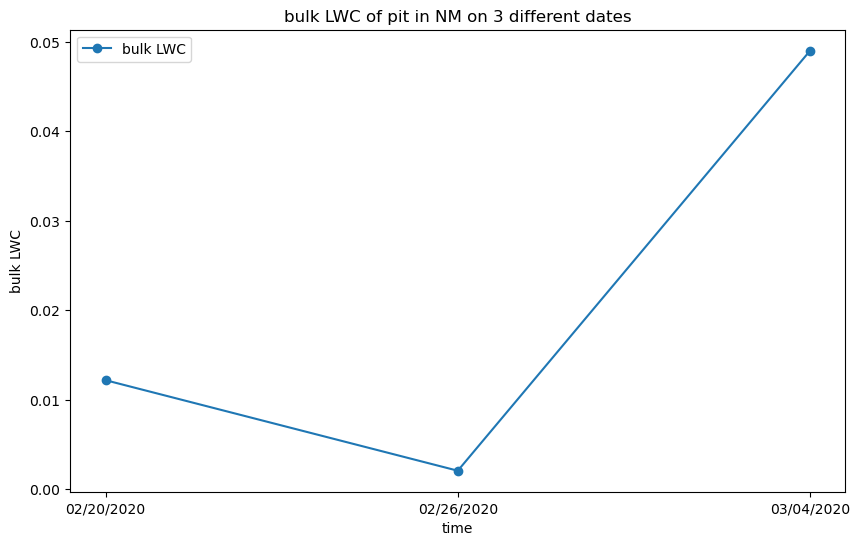

In [34]:
#plot the bulk LWC in a time series 
# Extract the LWCbulk values
lwcbulk_values = [lwcbulk1, lwcbulk2, lwcbulk3]

# Create a new DataFrame
data = {
    'Date': dates,
    'LWCbulk': lwcbulk_values
}

LWCbulk_df = pd.DataFrame(data)

print(LWCbulk_df)

#plot bulk LWC
plt.figure(figsize=(10, 6))

# Plot the first LWC data
plt.plot(LWCbulk_df['Date'], LWCbulk_df['LWCbulk'], marker='o', label='bulk LWC')
# Add labels and title
plt.xlabel('time')
plt.ylabel('bulk LWC')
plt.title('bulk LWC of pit in NM on 3 different dates')
plt.legend()

# Display the plot
plt.show()


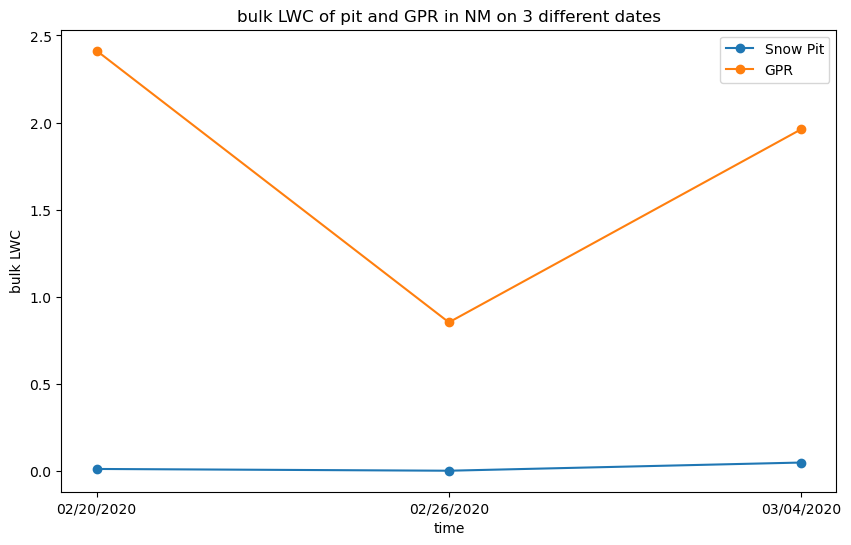

In [35]:
# Create a figure and axis
GPR_df = pd.read_csv('GPR_LWC.csv')

GPR_df['LWCpercent'] = GPR_df['LWC']*100
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the first LWC data
plt.plot(LWCbulk_df['Date'], LWCbulk_df['LWCbulk'], marker='o', label='Snow Pit')
# Plot the first LWC data
plt.plot(LWCbulk_df['Date'], GPR_df['LWCpercent'], marker='o', label='GPR')

# Add labels and title
plt.xlabel('time')
plt.ylabel('bulk LWC')
plt.title('bulk LWC of pit and GPR in NM on 3 different dates')
plt.legend()

# Display the plot
plt.show()